<a href="https://colab.research.google.com/github/angeloBuso/ml_SVM/blob/main/Template_SVM_ConstrucaoManual_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/angeloBuso/main/image/Imagem2-notebook.png">

---
# Template construção classificador SVM <a class="anchor" id="0.1"></a>

#### **Índice**
1.	[Compreensão Problema de Negócio](#1)
    - 1.1. [Dicionário dados](#1.1)
2.	[Coleta Dados](#2)
    - 2.1. [Carga dados](#2.1)
3.	[Análise Exploratória](#3)
    - 3.1 [Visão Geral dataSet](#3.1)
        - a [Pandas Profile Report](#a)
4. [Pré-Processamento dados](#4)
    - 4.1 [Feature Selection - Dimensionalidade](#4.1)
        - 4.1.1 [Visualização Dados](#4.1.1)
    - 4.2 [Split dados](#4.2)
        - 4.2.1 [ Preditores e Target](#4.2.1)
        - 4.2.2 [Estático - nível linha](#4.2.2)
5. [Seleção Algoritmo](#5)
    - 5.1. [(i) Construção do Algoritmo](#5.1.i)
        - 5.1.1 [criando parâmetros](#5.1.1.i)
        - 5.1.2 [Fit do Modelo](#5.1.2.i)
        - 5.1.3 [Predict do Modelo](#5.1.3.i)
        - 5.1.4 [Score do Modelo](#5.1.4.i)
    - 5.2. [(ii) Uso Sckit Learn](#5.2.ii)
        - 5.2.1 [Modelo](#5.2.1.ii)
        - 5.2.2 [Fit do Modelo](#5.2.2.ii)
        - 5.2.3 [Predict do Modelo](#5.2.3.ii)
        - 5.2.4 [Score do Modelo](#5.2.4.ii)

In [1]:
# Bibliotecas usadas no projeto

import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
import pandas_profiling as pp
warnings.filterwarnings("ignore")

## **1. Compreensão Problema de Negócio** <a class="anchor" id="1"></a>
O conceito de **vetores** é muito usado em Machine Learning, principalmente em algoritmos em que seus espaçõs de hipóteses possuem métodos baseados em **otimização**. Os *SVM's* (Suport Vector Machine) são um desses tipos de algoritimos e podem solucionar problemas/tarefas tanto de **classificação**, bem como **regressão**.

Quando os dados que estamos analisando não forem lineramente separáveis, os SVM's possuem habilidades de expor esses dados a **novas dimensões** e serem capazes de encontrar uma linha ou um *plano* [hyperplano/modelo preditivo] que consiga separar esses pontos de dados.

Logo, se meu espaço vetorial for de 2 dimensão, sendo dois atributos $\in \mathbb {R}^2 $, o *hyperplano* será uma **linha** que divida dos 2 conjuntos de dados. No entanto, se o espaço vetorial 3 ou mais atributos $\in \mathbb {R}^n $, o *hyperplano* será o **plano** que separa os pontos de dados

O objetivo desse notebook é mostrar como estão dispostas as operações matemáticas que realizam tal tarefa. Como forma de delimitar a compreensão e facilitar o entendimento trabalharemos apenas com 2 dimensões de nosso conjunto de dados.

Problema de negócio que queremos solucionar com o **SVM** é classificar entre 2 espécies indicadas, dado o "comprimento da pétala"[PetalLengthCm] e a "comprimento da sépala*"[SepalLengthCm] de cada obseração, típico problema de **Classificação binária**.

*Sépala: é como se fosse uma camada protetora das flores.


[Índice](#0.1)

### **1.1 Dicionário dados** <a class="anchor" id="1.1"></a>

* Id: registro de entrada único (normalmente não tem valor preditivo algum)
* SepalLengthCm: é o comprimento da Sépala;
* SepalWidthCm : é a largura da Sépala;
* PetalLengthCm: é o comprimento da Pétala;
* PetalWidthCm : é a largura da Pétala;
* Species      : a espécia da flor -> o que queremos prever

[Índice](#0.1)

## **2. Coleta Dados** <a class="anchor" id="2"></a>

[Índice](#0.1)

### **2.1 Carga dados** <a class="anchor" id="2.1"></a>
DICA: até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel); acima 3 dim NUMPY (nparray)

[Índice](#0.1)

In [2]:
# Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/angeloBuso/ml_SVM/main/dataSet/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 3. Análise Exploratória <a class="anchor" id="3"></a>


### 3.1 Visão Geral dataSet **<a class="anchor" id="3.1"></a>
Estatística Descritiva:*tipo Objeto; *tipo Dados; *shape - !Dimensionalidade; *Indices; *describe dados

[Índice](#0.1)

## Pandas Profile Report <a class="anchor" id="a"></a>
[Índice](#0.1)

In [3]:
#pp.ProfileReport(df)

## 4. Pré-Processamento dados <a class="anchor" id="4"></a>
Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.

É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

Para este notebook vamos (i.) excluir do nosso conjunto de dados os atributos que não usaremos, (ii.) identificar as variáveis preditoras e a variável alvo, (iii.) visualizar como estão dispostos os preditores e (iv.) dividir conjunto de dados em variáveis independentes e variável dependente para separar entre dados de treino e dados de teste.

[Índice](#0.1)

### 4.1 Feature Selection - Dimensionalidade <a class="anchor" id="4.1"></a> 

Conceito: Alta dimensionalidade gera problema de alta variância, tornando modelo não generalizável; Deve-se ater a seleção dos melhores atributos; Espera-se que os dados já estejam **normalizado** e/ou **padronizados**.

Para nosso propósito, que é didático, utilizaremos apenas 2 atributos nesse projeto, ou seja, queremos apenas um **espaço vetorial** de tamanho 2, sendo estes dois atributos $\in \mathbb {R}^2 $, logo o *hyperplano* será uma **linha** que dividirá estes 2 conjuntos de atributos.

Ainda temos que excluir uma classe da variável 'Species' para obtermos apenas 2 classificação e assim reformular para uma problema de classificação binária.

Importante destacar que todo pré-processamento que fazemos é expecífico do projeto e problema de negócio que queremos tratar.

[Índice](#0.1)

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# drop: Id, SepalWidthCm e PetalWidthCm
df= df.drop(['Id', 'SepalWidthCm', 'PetalWidthCm'], axis=1)

# drop: obtendo apenas classes binárias
df= df.drop(df.loc[df.Species == 'Iris-virginica'].index, axis=0)
df

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor


#### 4.1.1 Visualização Dados <a class="anchor" id="4.1.1"></a>
Colocar os dados de maneira visual, nos permite ter uma melhor compeensão de como estão dispostos os dados.


[Índice](#0.1)

In [6]:
# eixo x do plano cartesiano
x= df['SepalLengthCm']

# eixo y do plano cartesiano
y= df['PetalLengthCm']

# entretando temos 2 classes de flores: setosa e versicolor
setosa_x= x[:50]
setosa_y= y[:50]

versicolor_x= x[50:]
versicolor_y= y[50:]

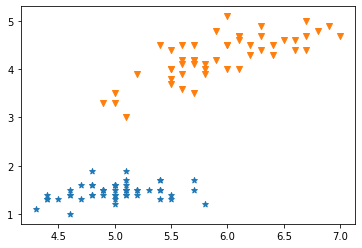

In [7]:
plt.scatter(setosa_x, setosa_y, marker= "*")
plt.scatter(versicolor_x, versicolor_y, marker= 'v');

# Visualmente temos a compreenssão de que espécies do tipo "versicolor" tendem a ter um cumprimento maior que as "setosas"

### 4.2 Split dados <a class="anchor" id="4.2"></a> 

Conceito: modelos de ML usam os dados históricos para compreender a relação entre os preditores, para então desenvolver um modelo preditivo. Separar os dados históricos em conjuntos de **treino** e **teste**, auxilia na avaliação do modelo. Essa etapa é chamada de split de dados onde, (a) separamos dos preditores da variável a ser predita e (b) separamos os conjuntos de treino e teste. 
   
técnicas: sklearn.model_selection import (i) train_test_split-estático e (ii) Cross-validation-randômico

[Índice](#0.1)

In [8]:
# vizualizar os dados pré-processados
df

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor


#### 4.2.1 Preditores e Target <a class="anchor" id="4.2.1"></a> 
Os preditores são as variáveis "conseguem" explicar a variável target, nesse caso serão *SepalLengthCm* e *PetalLengthCm*. A variável target é o que queremos prever, será o atributo *Species*.

Importante destacar que nossa variável target possui dados do tipo categórico, no entanto estão em um formato, string, que não é o adequado para a tarefa. Iremos subsituir pelo numeral "1" as espécies do tipo "Versicolor" e com o numeral "-1" as do tipo "Setosa". Atentem que a informação é a mesma, tanto o 1 e o -1 representam as classes de espécie, apenas estamos representando de uma forma diferente!!


[Índice](#0.1)

**Variável Alvo - Target**

In [9]:
target= df.Species

# forma I.
Y = []
for classe in target:
    if(classe == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)

# forma II
#dict = {'Iris-setosa':-1, 'Iris-versicolor':1}
#target = target.map(dict)
#target= target.tolist()

**Variáveis Preditoras**

In [10]:
# converto para uma lista pois iremos fazer o split. O output do método .values é um array unidimensianal.
X= df.drop(['Species'], axis=1).values.tolist()

#### 4.2.2 Estático - nível linha <a class="anchor" id="4.2.2"></a>

Divisão dos preditores-X e target em treino e teste.


[Índice](#0.1)

In [11]:
# aleatoriedade é importante em ML, antes do split embaralharemos os dados
X, Y = shuffle(X, Y)

x_treino = []
y_treino = []
x_teste = []
y_teste = []

# Split com 90% dos dados para treino e 10% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, train_size=0.9)

# output do split são objetos do tipo lista... precisamos de vetorizar:
x_treino = np.array(x_treino)
y_treino = np.array(y_treino)
x_teste = np.array(x_teste)
y_teste = np.array(y_teste)

O output dos objetos de treino e teste não possuem a mesma dimensionalidade, a variável a ser predita possui apenas 1 dimensão, ao passo que as variáveis possuem 2 dimensões, resultado da classificação binária e todos com a mesma quantidade de registros.

Sendo assim iremos ajustar a dimensões desses vetores para 1 dimensão.

In [12]:
# variáveis preditoras X

# dos preditores queremos todas as observações, no entato apenas a 1° dimensão
x1_treino= x_treino[:,0]
x1_teste = x_teste[:,0]

# dos preditores queremos todas as observações, no entato apenas a 2° dimensão
x2_treino= x_treino[:,1]
x2_teste = x_teste[:,1]

Agora todos os objetos x1_treino; x2_treino; y_treino e y_teste estão com a mesma quantidade de dimensão. Vetores do mesmo tamanho podem realizar operações.

In [13]:
x1_treino= x1_treino.reshape(90,1)
x2_treino= x2_treino.reshape(90,1)
y_treino= y_treino.reshape(90,1)

x1_teste= x1_teste.reshape(10,1)
x2_teste= x2_teste.reshape(10,1)
y_teste= y_teste.reshape(10,1)

In [14]:
y_teste.shape

(10, 1)

## 5. Seleção Algoritmo <a class="anchor" id="5"></a> 

Como os **SVM's** funcionam?

O objetivo dos algoritmos SVM's é encontrar o **hyperplano**, dentro do espaço vetorial, que **melhor separa** os pontos de dados. As margens que separam os pontos de dados podem ser largas ou estreitas, a depender dos parâmetros passados. Para além de compreender a largura dessas margem é importante compreender, nesse momento, que em cada margem encontram os *suport vectors*, os vetores limites de cada classe de dados, servirá para delimitar o limite dessa classe a qual o vetor pertença. Esses vetores limites daram o *suporte* para delimitar um "divisor". Sendo que cada classe de vetor, atributos do modelo, terá seu próprio "divisor". A metade da distância entre esses "divisores" é um modelo de SVM, pois é a metade de cada limite de vetores de suporte.

Abaixo, de forma simples, tem um figura que ilustra essa explicação acima.

[Índice](#0.1)

<center><img alt="Colaboratory logo" width="50%" src="https://github.com/angeloBuso/ml_SVM/blob/main/image/svm_artigo.PNG?raw=true"></center>

Para o algoritmo SVM atingir seu objetivo de encontrar o **melhor hyperplano** que separa os pontos de dados, logo (i) atribuirá pesos a cada entrada de dados, (ii) identifica a função de custo, (iii) atribui um parâmetro de regularização se teve erro de previsão, (iv) calcula derivada da função de custo e (v) atualiza os pesos com essas derivadas. Esse processo é iterativo!!

A maximização das margens nos pontos de dados se dá pela função de custo, que nada mais é do que a medida do erro do valor previsto, comparado com o valor observado, logo quando menor o erro mais preciso é o modelo.

Para algortimos SVM's usa-se como calculo do erro a função **hinge loss** de custo. Essa função como saída atribui valor "0" para acerto do modelo e o valor "1" quando modelo errou a previsão.

Quando houver um erro do modelo e o valor atribuido foi "1", na função de custo é adicionado um **parâmetro de regularização** 
 ($"\lambda"$-> tem por objetivo equilibrar a maximização e a perda de margem). Com a função de custo mais o $\lambda$, usa-se *derivadas* para encontrar os gradientes e atualizar os pesos, para uma nova passada no modelo (iteratividade).
 
Quando não houver erro de pevisão, significa que o resultado da função de custo é zero (valor previsto e valor real possuem mesmo sinal), apenas ocorre a atualização no gradiente dos pesos e a itratividade continua.

Abaixo demonstraremos como ocorre as operções matemáticas que um SVM realiza e logo após um modelo de um framework com SVM.

## 5.1 (i) - Construção do Algoritmo <a class="anchor" id="5.1.i"></a>

Um modelo de ML são o uso iterativo de operações matermáticas e estatísticas, aninhadas com uso intensivo de ciências da computação.

[Índice](#0.1)

#### 5.1.1 criando parâmetros <a class="anchor" id="5.1.1.i"></a>
Atribuiremos os pesos que serão utilizados no treinamento do modelo. Nesse caso serão 2 pesos pois temos 2 variáveis explicativas.

[Índice](#0.1)

In [15]:
peso1 = np.zeros((90,1))
peso2 = np.zeros((90,1))

# parâmetros de controle de iteratividade
epochs= 1 
alpha= 0.0001

#### 5.1.2 treino modelo (.fit) <a class="anchor" id="5.1.2.i"></a>


[Índice](#0.1)

In [16]:
# expressão matematica que fará a de forma iterativa a multiplicação dos pesos e os valores das variáveis preditoras
while(epochs < 10000):
    
    # a. identifico qual é o valor previsto, dado aos preditores e aos pesos
    y = (peso1 * x1_treino) + (peso2 * x2_treino)
    
    # b. comparo com valor observado -> objetivo é ver o erro de previsão com os pesos atribuídos
    prod = y * y_treino
    
    #print(epochs)    
    count = 0
    
    # c. verificamos se o modelo acertou com os valores de pesos passados.
    for val in prod:
        # c.1 se o modelo acertou, apenas atualiza os pesos, e realiza uma nova passada se o epochs for atendido
        if(val >= 1):
            cost = 0
            peso1 = peso1 - alpha * (2 * 1/epochs * peso1)
            peso2 = peso2 - alpha * (2 * 1/epochs * peso2)
        
        # c.2 se modelo errou a previsão, derivamos os pesos para encontrar novos valores, adicionando parâmetros           
        else:
            cost = 1 - val 
            peso1 = peso1 + alpha * (x1_treino[count] * y_treino[count] - 2 * 1/epochs * peso1)
            peso2 = peso2 + alpha * (x2_treino[count] * y_treino[count] - 2 * 1/epochs * peso2)
        count += 1
    epochs += 1

#### 5.1.3 teste modelo (.predict) <a class="anchor" id="5.1.3.i"></a>

Com o modelo treinado, identificamos os **melhores** valores dos pesos. Usaremos tais pesos para testar o modelo.

Os dados de treino possuem apenas 10 registros, na etapa de split 90%[90 obs.] dos dados foram para o treino e 10%[10 obs.] ficaram nos dados de treino. 

[Índice](#0.1)

Obtendo uma lista com 10 observações de pesos.

In [17]:
indice= list(range(10,90))
peso1= np.delete(peso1, indice)
peso2= np.delete(peso2, indice)

# colocando mesmo shape 
peso1= peso1.reshape(10,1)
peso2= peso2.reshape(10,1)

In [18]:
peso1#.shape

array([[-1.03228028],
       [-1.03228028],
       [-1.03228028],
       [-1.03228028],
       [-1.03228028],
       [-1.03228028],
       [-1.03228028],
       [-1.03228028],
       [-1.03228028],
       [-1.03228028]])

Previsões

In [19]:
# previsão = a soma dos produtos entre os pesos e so preditores 
y_pred = (peso1 * x1_teste) + (peso2 * x2_teste)

# lita para receber as previsões
previsoes = []

for val in y_pred:
    if(val > 1):
        previsoes.append(1)
    else:
        previsoes.append(-1)
        

#### 5.1.4 performance modelo (.score) <a class="anchor" id="5.1.4.i"></a>

Usando uma função que compara valor previsto com valor observado temos:

[Índice](#0.1)

In [20]:
print("\nAcurácia nos Dados de Teste (Algoritmo Personalizado)", accuracy_score(y_teste, previsoes))


Acurácia nos Dados de Teste (Algoritmo Personalizado) 1.0


## 5.2 (ii) - Uso Sckit Learn <a class="anchor" id="5.2.ii"></a>
Sckit Learn é um framework em linguagem Python que já possuim algritmos encapsulados em bibliotecas. Ou seja, todas as operações matemáticas e estatísticas, de uma forma bem mais performática.

Iremos usar a biblioteca de algotimo de SVM no Sckit e comparar com a construção manual realizada anteriormente.
Será usado os mesmo dados pré-processados.


[Índice](#0.1)

#### 5.2.1 criar modelo <a class="anchor" id="5.2.1.ii"></a>

[Índice](#0.1)

In [21]:
modelo = SVC(kernel='linear')

#### 5.2.2 treino modelo (.fit) <a class="anchor" id="5.2.2.ii"></a>


[Índice](#0.1)

In [22]:
modelo.fit(x_treino,y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 5.2.3 teste modelo (.predict) <a class="anchor" id="5.2.3.ii"></a>


[Índice](#0.1)

In [23]:
y_pred = modelo.predict(x_teste)

#### 5.2.4 performance modelo (.score) <a class="anchor" id="5.2.4.ii"></a>


[Índice](#0.1)

In [24]:
print("\nAcurácia nos Dados de Teste (Algoritmo Pronto do Scikit-Learn)",accuracy_score(y_teste, y_pred))


Acurácia nos Dados de Teste (Algoritmo Pronto do Scikit-Learn) 1.0


________________

Com isso concluimos que não precisamos *reinventar* a roda... podemos maximizar nosso tempo, no entando cabe a nós entender o mínimo que cada algoritmo realiza, pois ai saberemos personalizar e usar com mais eficiência!!